In [9]:
import pandas as pd
from iminuit import Minuit 
from iminuit.cost import LeastSquares
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


In [10]:
def cut_df(df: pd.DataFrame, sec: tuple) -> pd.DataFrame:
    """
    Rimuove i dati al di fuori del range definito da sec.
    """
    return df[(df.iloc[:,0] >= sec[0]) & (df.iloc[:,0] <= sec[1])].copy()

In [11]:
def read_data(file_path1, file_path2, X1, X2):

    Z = pd.read_csv(file_path1, delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1')
    B = pd.read_csv(file_path2, delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1')

    Z_spuro = cut_df(Z, (X1, X2)) 
    B_spuro1 = cut_df(B, (X1, X2))

    St = np.sqrt(Z_spuro[1] + B_spuro1[1])
    Z_puro = Z_spuro[1] - B_spuro1[1]

    return (Z_spuro[0], Z_puro, St)

In [12]:
def gaussian(X, S, Z, K):
    'K = fattore di scala'
    return(K*(1/(np.sqrt(2*np.pi)*S)*np.exp(-((X-Z)/S)**2)))

In [13]:
def func_Na (X, S, Z, K, a, c):
    'K e D = fattori di scala'
    return gaussian(X, S, Z, K) + a*X**(-1) + c
'plot per il sodio'

'plot per il sodio'

In [14]:
def analisi_Sodio(X, Y, St):

    L_S = LeastSquares(X, Y, St, func_Na)
    my_minuit = Minuit (L_S, S = 100, K = 4000, Z = 10000, a = 0, c = 0)  
    my_minuit.migrad () 
    my_minuit.hesse ()   

#validità
    V = my_minuit.valid
    print('Validità: ', V)
    Q_squared = my_minuit.fval
    print ('Q-squared: ', Q_squared)
    N_dof = my_minuit.ndof
    print ('DOF: ', N_dof)
    p_v = 1 - chi2.cdf(Q_squared, N_dof)
    print('P value: ', p_v )

#visualizzazione 
    display(my_minuit)

#valori dell'interpolazione
    a_f = my_minuit.values[0]
    b_f = my_minuit.values[1]
    c_f = my_minuit.values[2]
    d_f = my_minuit.values[3]
    e_f = my_minuit.values[4]

    print('Deviazione standard: ', a_f)
    print('Fattore di scala: ', c_f)
    print('Posizione picco in ADC counts: ', b_f)
    print('Valori del fondo iperbolico, a :', d_f, 'c :', e_f)

    return (a_f, b_f, c_f, d_f, e_f)

In [15]:
def analisi_Cobalto(X, Y, St):

    L_S = LeastSquares(X, Y, St, gaussian)
    my_minuit = Minuit (L_S, S = 100, K = 3000, Z = 2500)  
    my_minuit.migrad () 
    my_minuit.hesse ()   

#validità
    V = my_minuit.valid
    print('Validità: ', V)
    Q_squared = my_minuit.fval
    print ('Q-squared: ', Q_squared)
    N_dof = my_minuit.ndof
    print ('DOF: ', N_dof)
    p_v = 1 - chi2.cdf(Q_squared, N_dof)
    print('P value: ', p_v )

#visualizzazione 
    display(my_minuit)

#valori dell'interpolazione
    a_f = my_minuit.values[0]
    b_f = my_minuit.values[1]
    c_f = my_minuit.values[2]

    print('Deviazione standard: ', a_f)
    print('Fattore di scala: ', c_f)
    print('Posizione picco in ADC counts: ', b_f)

    return (a_f, b_f, c_f)

C:\Users\matte\AppData\Local\Temp\ipykernel_6808\3496220110.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Z = pd.read_csv(file_path1, delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1')
C:\Users\matte\AppData\Local\Temp\ipykernel_6808\3496220110.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  B = pd.read_csv(file_path2, delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1')


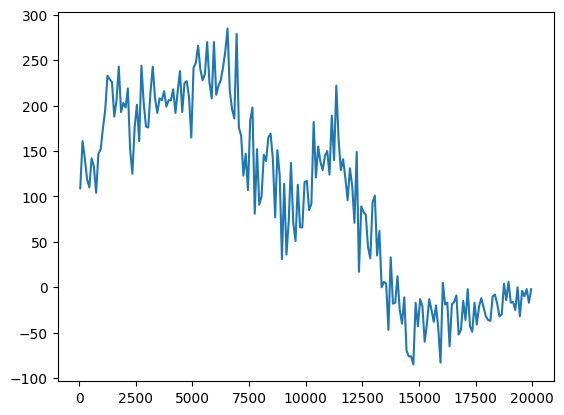

In [ ]:
#X1 = read_data(r'\Dati\Parte 2\Alluminio\Na_lyso_1.txt', r'\Dati\Parte 2\LySO\Bkg_55.5V.txt' , 0, 20000)
#X2 = read_data(r'Dati\Parte 2\Alluminio\Na_lyso_2.txt', r'Dati\Parte 2\LySO\Bkg_30min.txt', 0, 20000)
#X3 = read_data(r'Dati\Parte 2\Alluminio\Na_lyso_3.txt', r'Dati\Parte 2\LySO\Bkg_30min.txt', 0, 20000)
#X4 = read_data(r'Dati\Parte 2\Alluminio\Na_lyso_4.txt', r'Dati\Parte 2\LySO\Bkg_30min.txt', 0, 20000)

plt.plot(X1[0], X1[1], label = 'Na spuro')